In [1]:
import pandas as pd

df = pd.read_excel('Data/Data.xlsx', sheet_name=1, header=None, skiprows=1)

feature_vector = df.iloc[0:1086, :]

additional_features = df.iloc[1087:1099, :]

feature_vector.reset_index(drop=True, inplace=True)
additional_features.reset_index(drop=True, inplace=True)


feature_vector_T = feature_vector.transpose()
additional_features_T = additional_features.transpose()

full_data = pd.concat([feature_vector_T, additional_features_T], axis=1)

full_data.reset_index(drop=True, inplace=True)


df = full_data
df = df.drop(0, axis=0)
df
df.to_csv('output.csv', index=False)

import pandas as pd

df = pd.read_excel('Data/Data.xlsx', sheet_name=1, header=None, skiprows=1)

feature_vector = df.iloc[0:1086, :]

additional_features = df.iloc[1087:1099, :]

feature_vector.reset_index(drop=True, inplace=True)
additional_features.reset_index(drop=True, inplace=True)


feature_vector_T = feature_vector.transpose()
additional_features_T = additional_features.transpose()

full_data = pd.concat([feature_vector_T, additional_features_T], axis=1)

full_data.reset_index(drop=True, inplace=True)


df = full_data
df = df.drop(0, axis=0)
df
df.to_csv('output.csv', index=False)


new_header = df.iloc[0]
df = df[1:]
df.columns = new_header

# Reset index for the final DataFrame
df.reset_index(drop=True, inplace=True)

df.head()

pd.set_option('display.max_columns', None)  

df = df[~df.isin(['x']).any(axis=1)]

one_hot_encoded_data = pd.get_dummies(df, columns = ['Digester', 'Source', 'Type', 'Waste', 'Biomass']).astype(int)
# print(one_hot_encoded_data)
df_use = one_hot_encoded_data


In [2]:
# df_use = pd.read_csv('Data/df.csv')

df_cleaned = df_use

target_columns = ['ACE-km', 'H2-km']

# Identify digester columns
digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]

# Define groups for Leave-One-Group-Out cross-validation
groups = df_cleaned[digester_columns].idxmax(axis=1)

# Remove only target columns from features
feature_columns = df_cleaned.columns.difference(target_columns)

# Identify non-target, non-digester columns for normalization
non_target_non_digester_columns = feature_columns.difference(digester_columns)

## CNN

In [31]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, Dropout, Flatten, Dense, Add
from tensorflow.keras.models import Model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Function to build the neural network model
def build_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        Dropout(0.3),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        Dropout(0.3),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

def build_deeper_cnn(input_shape):
    """
    A deeper CNN with skip connections (residual blocks).
    Example of a single residual block for 1D data.
    Adjust filter sizes, # of filters, etc. as needed.
    """
    inputs = Input(shape=input_shape)
    
    # ----- First conv block -----
    x = Conv1D(64, kernel_size=3, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # ----- Residual block 1 -----
    shortcut = x
    x = Conv1D(64, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv1D(64, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    # add skip
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    # ----- Residual block 2 -----
    shortcut = x
    x = Conv1D(64, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv1D(64, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    # add skip
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    
    # Dense layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    
    # Output for regression
    outputs = Dense(1, activation='linear')(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='mse')
    return model


2025-01-27 17:14:56.875055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:15:03.617648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 255ms/step


2025-01-27 17:15:04.187579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 201ms/step


2025-01-27 17:15:09.630054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:15:10.154002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 220ms/step


2025-01-27 17:15:17.272835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:15:17.778744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:15:22.471705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 271ms/step


2025-01-27 17:15:23.101057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 223ms/step


2025-01-27 17:15:28.796182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:15:29.293897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 140ms/step


2025-01-27 17:15:33.978521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:15:34.384210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 163ms/step


2025-01-27 17:15:39.826247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:15:40.253537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s

2025-01-27 17:15:46.873108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 230ms/step


2025-01-27 17:15:47.379899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:15:53.869723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 275ms/step


2025-01-27 17:15:54.403933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 214ms/step


2025-01-27 17:16:00.098386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:16:00.640839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:16:05.990718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 232ms/step


2025-01-27 17:16:06.496223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 176ms/step


2025-01-27 17:16:11.003940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:16:11.451829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 185ms/step


2025-01-27 17:16:16.358854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:16:16.848108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 201ms/step


2025-01-27 17:16:23.151563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:16:23.621089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 174ms/step


2025-01-27 17:16:28.709759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:16:29.208934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 135ms/step


2025-01-27 17:16:35.165763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:16:35.550660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 169ms/step


2025-01-27 17:16:38.359438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:16:38.751441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 166ms/step


2025-01-27 17:16:44.091712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


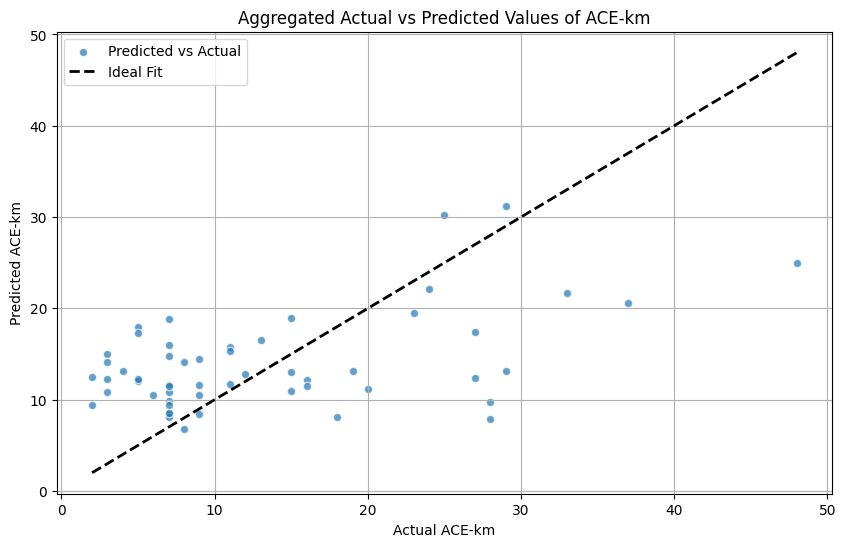


Overall Cross-Validation Metrics for ACE-km:
Mean Squared Error: 76.8964
R-squared: 0.2587


2025-01-27 17:16:46.724760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 188ms/step


2025-01-27 17:16:53.864017: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:16:54.328476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 179ms/step


2025-01-27 17:17:00.526784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:17:00.951316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 174ms/step


2025-01-27 17:17:07.236801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:17:07.637919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 141ms/step


2025-01-27 17:17:13.247923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:17:13.635743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 225ms/step


2025-01-27 17:17:18.690126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:17:19.163428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 129ms/step


2025-01-27 17:17:23.398213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:17:23.770033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 146ms/step


2025-01-27 17:17:29.886407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:17:30.280007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 169ms/step


2025-01-27 17:17:36.554360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:17:36.955868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 198ms/step


2025-01-27 17:17:43.809382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:17:44.255108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 159ms/step


2025-01-27 17:17:48.796606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:17:49.259177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 168ms/step


2025-01-27 17:17:55.673021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:17:56.074911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 202ms/step


2025-01-27 17:18:01.287493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:18:01.895492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 174ms/step


2025-01-27 17:18:08.267847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:18:08.676310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 227ms/step


2025-01-27 17:18:13.653530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:18:14.187643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 155ms/step


2025-01-27 17:18:20.073460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:18:20.490752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 224ms/step


2025-01-27 17:18:26.966019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:18:27.416199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 149ms/step


2025-01-27 17:18:31.417995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:18:31.786289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:18:39.087448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 261ms/step


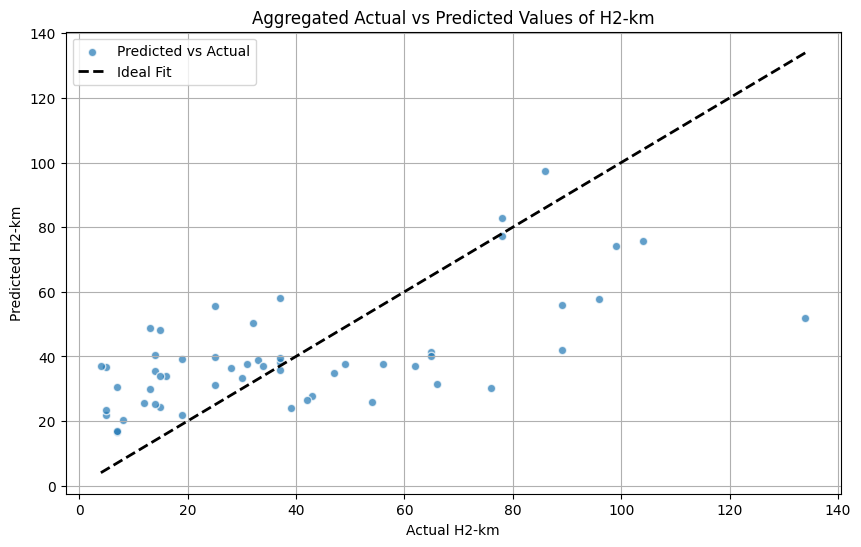


Overall Cross-Validation Metrics for H2-km:
Mean Squared Error: 581.0247
R-squared: 0.3932


In [33]:
# Target columns
target_columns = ['ACE-km', 'H2-km']

# Clean the data and remove rows with 'x'
df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

# Identify digester columns and define groups
digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]
groups = df_cleaned[digester_columns].idxmax(axis=1)

# Apply MinMax normalization only to non-target columns
non_target_columns = df_cleaned.select_dtypes(include=[np.number]).columns.difference(target_columns)
# scaler = MinMaxScaler()
# df_cleaned[non_target_columns] = scaler.fit_transform(df_cleaned[non_target_columns])

from sklearn.preprocessing import StandardScaler

# Apply standard scaling
scaler = StandardScaler()
df_cleaned[non_target_non_digester_columns] = scaler.fit_transform(df_cleaned[non_target_non_digester_columns])


df_cleaned = df_cleaned.astype(np.float32)

# Initialize Leave-One-Group-Out cross-validator
logo = LeaveOneGroupOut()

# Perform cross-validation for each target
for target_column in target_columns:
    # Prepare data for the target variable
    X = df_cleaned.drop(columns=target_columns).values
    y = df_cleaned[target_column].values

    # Reshape X for Conv1D
    X = X.reshape(X.shape[0], X.shape[1], 1)

    y_tests = []
    y_preds = []

    for train_index, test_index in logo.split(X, y, groups):
        # Split data into training and testing sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Build and train the model
        model = build_model((X_train.shape[1], 1))
        early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
        model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, callbacks=[early_stopping])

        # Predict and store results
        y_pred = model.predict(X_test).flatten()
        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    # Evaluate model performance
    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print overall results
    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")


## Autoencoder


=== Target: ACE-km ===


2025-01-27 16:58:30.627588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 49ms/step


2025-01-27 16:58:32.580169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:58:33.077914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 132ms/step


2025-01-27 16:58:35.187038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:58:35.531030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 25ms/step


2025-01-27 16:58:37.226276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:58:37.715689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 152ms/step


2025-01-27 16:58:39.898351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:58:40.233606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 18ms/step


2025-01-27 16:58:42.008630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:58:42.337272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 167ms/step


2025-01-27 16:58:44.301352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:58:44.676486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 13ms/step


2025-01-27 16:58:46.048766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:58:46.357034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 106ms/step


2025-01-27 16:58:48.054799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:58:48.354163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 14ms/step


2025-01-27 16:58:49.777626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:58:50.100928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 141ms/step


2025-01-27 16:58:51.718209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:58:52.052602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 83ms/step


2025-01-27 16:58:54.102139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:58:56.296401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 136ms/step


2025-01-27 16:58:59.097365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:58:59.445155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 14ms/step


2025-01-27 16:59:00.872528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:01.234919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 122ms/step


2025-01-27 16:59:02.835099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:03.165184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 13ms/step


2025-01-27 16:59:04.349959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:04.665474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 146ms/step


2025-01-27 16:59:07.062466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:07.411898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 19ms/step


2025-01-27 16:59:08.959537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:09.362695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 136ms/step


2025-01-27 16:59:12.120368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:12.468648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 15ms/step


2025-01-27 16:59:14.219974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:14.592514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 126ms/step


2025-01-27 16:59:16.578496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:16.903703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 14ms/step


2025-01-27 16:59:18.583341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:18.895396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 121ms/step


2025-01-27 16:59:21.290026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:21.629453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 24ms/step


2025-01-27 16:59:23.268292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:23.692597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 125ms/step


2025-01-27 16:59:25.602016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:25.929882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 15ms/step


2025-01-27 16:59:27.415586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:27.768808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 107ms/step


2025-01-27 16:59:29.944825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:30.245798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 17ms/step


2025-01-27 16:59:31.724294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:32.062804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 116ms/step


2025-01-27 16:59:34.231227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:34.537316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 13ms/step


2025-01-27 16:59:36.294891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:36.630709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 103ms/step


2025-01-27 16:59:38.955948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:40.733201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 59ms/step


2025-01-27 16:59:42.788834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:43.165880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 116ms/step


2025-01-27 16:59:45.435547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:45.732289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 15ms/step


2025-01-27 16:59:46.796882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:47.092122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 125ms/step


2025-01-27 16:59:48.448349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:48.792545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 43ms/step


2025-01-27 16:59:50.534159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:50.884696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 115ms/step


2025-01-27 16:59:52.939628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


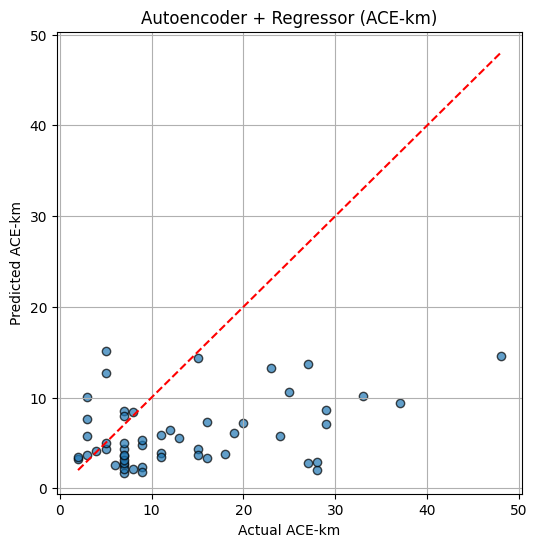

Cross-Validation MSE: 144.1772
Cross-Validation R2:  -0.3900

=== Target: H2-km ===


2025-01-27 16:59:53.429139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 20ms/step


2025-01-27 16:59:55.081413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:55.610600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 127ms/step


2025-01-27 16:59:58.218593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:59:58.563050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 36ms/step


2025-01-27 17:00:00.163804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:00.501927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 122ms/step


2025-01-27 17:00:02.318210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:02.626971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 14ms/step


2025-01-27 17:00:04.273899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:04.604678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 99ms/step


2025-01-27 17:00:06.769247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:07.063968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 16ms/step


2025-01-27 17:00:08.488779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:08.794562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 99ms/step


2025-01-27 17:00:10.972643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:11.280212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 17ms/step


2025-01-27 17:00:12.522496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:12.831801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 122ms/step


2025-01-27 17:00:14.906324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:15.222448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 24ms/step


2025-01-27 17:00:16.798116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:17.111087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 154ms/step


2025-01-27 17:00:20.803547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:21.223227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 17ms/step


2025-01-27 17:00:22.791365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:23.166064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:24.770465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 290ms/step


2025-01-27 17:00:25.322520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 152ms/step


2025-01-27 17:00:27.105954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 42ms/step


2025-01-27 17:00:27.816974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 144ms/step


2025-01-27 17:00:30.402996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:30.765506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 14ms/step


2025-01-27 17:00:32.375645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:32.723373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 177ms/step


2025-01-27 17:00:35.005159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:35.448977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 58ms/step


2025-01-27 17:00:37.173564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:37.547468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 126ms/step


2025-01-27 17:00:39.827559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:40.142277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 17ms/step


2025-01-27 17:00:41.831514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:42.161839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 150ms/step


2025-01-27 17:00:44.498759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:44.916940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 43ms/step


2025-01-27 17:00:46.656372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:47.048422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 139ms/step


2025-01-27 17:00:49.550620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:49.892559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 13ms/step


2025-01-27 17:00:51.279157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:51.582011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 118ms/step


2025-01-27 17:00:53.232980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:53.544629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 22ms/step


2025-01-27 17:00:55.124433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:55.507029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 122ms/step


2025-01-27 17:00:57.651248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:57.981353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 13ms/step


2025-01-27 17:00:59.262993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:00:59.616528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 93ms/step


2025-01-27 17:01:01.779066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:01:02.051587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 13ms/step


2025-01-27 17:01:03.460093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:01:05.149471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 118ms/step


2025-01-27 17:01:07.658815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:01:08.007527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 25ms/step


2025-01-27 17:01:09.089457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:01:09.389610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 120ms/step


2025-01-27 17:01:10.574392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:01:10.873813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 17ms/step


2025-01-27 17:01:12.302724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:01:12.603530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 107ms/step


2025-01-27 17:01:14.943996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


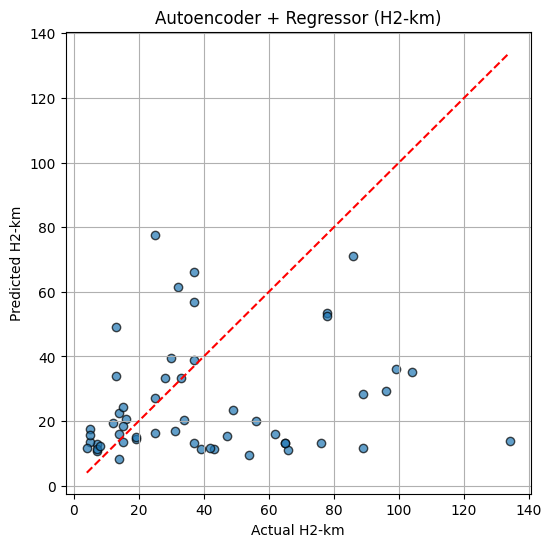

Cross-Validation MSE: 1284.2529
Cross-Validation R2:  -0.3412


In [30]:
import tensorflow as tf
from tensorflow.keras import Model, layers

def build_autoencoder(input_dim, latent_dim=32):
    """
    Returns two models: (autoencoder, encoder).
    - autoencoder: Trains end-to-end, reconstructing input -> output.
    - encoder: Extracts the latent representation (size=latent_dim).
    """
    # ----- ENCODER -----
    encoder_input = tf.keras.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(encoder_input)
    x = layers.Dense(64, activation='relu')(x)
    latent_output = layers.Dense(latent_dim, activation='relu')(x)  # Bottleneck
    encoder = Model(encoder_input, latent_output, name='encoder')

    # ----- DECODER -----
    decoder_input = tf.keras.Input(shape=(latent_dim,))
    y = layers.Dense(64, activation='relu')(decoder_input)
    y = layers.Dense(128, activation='relu')(y)
    reconstruction = layers.Dense(input_dim, activation='linear')(y)
    decoder = Model(decoder_input, reconstruction, name='decoder')

    # ----- AUTOENCODER (ENCODER + DECODER) -----
    autoencoder_input = encoder_input
    autoencoder_output = decoder(encoder(autoencoder_input))
    autoencoder = Model(autoencoder_input, autoencoder_output, name='autoencoder')
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mse')
    
    return autoencoder, encoder


def build_regressor(input_dim):
    """
    A simple MLP regressor. 
    Takes latent vectors (size=input_dim) and outputs a single value (for regression).
    """
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='linear')
    ])
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))
    return model

    # model = Sequential([
    #     Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_dim),
    #     Conv1D(filters=64, kernel_size=3, activation='relu'),
    #     Dropout(0.3),
    #     Conv1D(filters=32, kernel_size=3, activation='relu'),
    #     Conv1D(filters=32, kernel_size=3, activation='relu'),
    #     Dropout(0.3),
    #     Flatten(),
    #     Dense(32, activation='relu'),
    #     Dense(1)
    # ])
    # model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    # return model
    
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, Dropout, Flatten, Dense
# from tensorflow.keras.optimizers import Adam

# def build_regressor(latent_dim):
#     """
#     A Conv1D-based regressor. 
#     Takes latent vectors (size=latent_dim) and outputs a single value (for regression).
#     """
#     # Reshape the input to have a single channel (required by Conv1D)
#     input_shape = (latent_dim, 1)  # Treat the latent vector as a 1D sequence with 1 feature
    
#     model = Sequential([
#         Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
#         Conv1D(filters=64, kernel_size=3, activation='relu'),
#         Dropout(0.3),
#         Conv1D(filters=32, kernel_size=3, activation='relu'),
#         Conv1D(filters=32, kernel_size=3, activation='relu'),
#         Dropout(0.3),
#         Flatten(),
#         Dense(32, activation='relu'),
#         Dense(1)
#     ])
#     model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
#     return model

    

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Suppose df_use is your original dataframe
df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)].copy()

# Identify groups
digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]
groups = df_cleaned[digester_columns].idxmax(axis=1)

target_columns = ['ACE-km', 'H2-km']
non_target_columns = df_cleaned.select_dtypes(include=[np.number]).columns.difference(target_columns)

# Standard scaling (excluding your digester columns if you want)
scaler = StandardScaler()
df_cleaned[non_target_columns] = scaler.fit_transform(df_cleaned[non_target_columns])

df_cleaned = df_cleaned.astype(np.float32)

logo = LeaveOneGroupOut()

for target_column in target_columns:
    print(f"\n=== Target: {target_column} ===")
    
    X_df = df_cleaned.drop(columns=target_columns)
    y_df = df_cleaned[target_column]

    X = X_df.values  # shape: (num_samples, num_features)
    y = y_df.values  # shape: (num_samples, )

    # We'll do the autoencoder on the flattened feature dimension
    input_dim = X.shape[1]
    latent_dim = 32  # you can tune this

    y_tests, y_preds = [], []

    for train_idx, test_idx in logo.split(X, y, groups):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # 1) Build & train autoencoder (unsupervised) on X_train
        autoencoder, encoder = build_autoencoder(input_dim, latent_dim=latent_dim)
        early_stopping_ae = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
        autoencoder.fit(X_train, X_train,
                        epochs=50,
                        batch_size=16,
                        verbose=0,
                        callbacks=[early_stopping_ae])

        # 2) Encode X_train and X_test to get latent representations
        X_train_encoded = encoder.predict(X_train)
        X_test_encoded = encoder.predict(X_test)

        # 3) Build regressor on top of latent space
        regressor = build_regressor(latent_dim)
        early_stopping_reg = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
        regressor.fit(X_train_encoded, y_train,
                      epochs=50,
                      batch_size=16,
                      verbose=0,
                      callbacks=[early_stopping_reg])

        # 4) Predict on X_test_encoded
        y_pred = regressor.predict(X_test_encoded).flatten()
        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    # Evaluate performance across folds
    mse = mean_squared_error(y_tests, y_preds)
    r2 = r2_score(y_tests, y_preds)
    
    # Plot actual vs. predicted
    plt.figure(figsize=(6, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='k')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'r--')
    plt.xlabel(f'Actual {target_column}')
    plt.ylabel(f'Predicted {target_column}')
    plt.title(f'Autoencoder + Regressor ({target_column})')
    plt.grid(True)
    plt.show()
    
    print(f"Cross-Validation MSE: {mse:.4f}")
    print(f"Cross-Validation R2:  {r2:.4f}")


## VAE

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, Model, backend as K

class VAE(Model):
    def __init__(self, input_dim, latent_dim=32):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim

        # ----- ENCODER -----
        self.encoder_dense1 = layers.Dense(128, activation='relu')
        self.encoder_dense2 = layers.Dense(64, activation='relu')
        self.z_mean = layers.Dense(latent_dim)
        self.z_logvar = layers.Dense(latent_dim)

        # ----- DECODER -----
        self.decoder_dense1 = layers.Dense(64, activation='relu')
        self.decoder_dense2 = layers.Dense(128, activation='relu')
        self.decoder_out = layers.Dense(input_dim, activation='linear')

    def encode(self, x):
        x = self.encoder_dense1(x)
        x = self.encoder_dense2(x)
        z_mean = self.z_mean(x)
        z_logvar = self.z_logvar(x)
        return z_mean, z_logvar

    def reparameterize(self, mean, logvar):
        # Reparameterization trick: z = mean + eps * exp(logvar/2)
        eps = tf.random.normal(shape=tf.shape(mean))
        return mean + tf.exp(0.5 * logvar) * eps

    def decode(self, z):
        x = self.decoder_dense1(z)
        x = self.decoder_dense2(x)
        reconstruction = self.decoder_out(x)
        return reconstruction

    def call(self, x):
        # Forward pass for training
        z_mean, z_logvar = self.encode(x)
        z = self.reparameterize(z_mean, z_logvar)
        reconstruction = self.decode(z)
        return reconstruction, z_mean, z_logvar

# Custom VAE loss that includes reconstruction + KL divergence
def vae_loss(x, x_recon, z_mean, z_logvar):
    # MSE reconstruction loss
    recon_loss = tf.reduce_mean(tf.reduce_sum(tf.square(x - x_recon), axis=1))
    # KL divergence
    kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + z_logvar - tf.square(z_mean) - tf.exp(z_logvar), axis=1))
    return recon_loss + kl_loss

@tf.function
def train_step_vae(model, x, optimizer):
    with tf.GradientTape() as tape:
        x_recon, z_mean, z_logvar = model(x)
        loss_value = vae_loss(x, x_recon, z_mean, z_logvar)
    grads = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return loss_value

def train_vae(model, X_train, epochs=50, batch_size=16):
    optimizer = tf.keras.optimizers.Adam(1e-3)
    dataset = tf.data.Dataset.from_tensor_slices(X_train).batch(batch_size)
    for epoch in range(epochs):
        epoch_loss = 0.0
        cnt = 0
        for batch_x in dataset:
            loss = train_step_vae(model, batch_x, optimizer)
            epoch_loss += loss
            cnt += 1
        if epoch % 10 == 0:
            print(f"Epoch {epoch} VAE loss: {epoch_loss/cnt:.4f}")

def get_latent_vectors(model, X_data):
    # Returns the latent mean (z_mean) for each sample
    z_means = []
    batch_size = 128
    dataset = tf.data.Dataset.from_tensor_slices(X_data).batch(batch_size)
    for batch_x in dataset:
        z_mean, z_logvar = model.encode(batch_x)
        z_means.append(z_mean.numpy())
    return np.concatenate(z_means, axis=0)

for target_column in target_columns:
    print(f"\n=== Target: {target_column} ===")
    
    # Prepare features (X) and target (y)
    X_df = df_cleaned.drop(columns=target_columns)
    y_df = df_cleaned[target_column]
    
    X = X_df.values
    y = y_df.values

    # Flatten the input for VAE (ensure 2D shape)
    X = X.reshape(X.shape[0], -1)

    input_dim = X.shape[1]
    latent_dim = 32

    y_tests, y_preds = [], []

    for train_idx, test_idx in logo.split(X, y, groups):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # 1) Build & train VAE
        vae = VAE(input_dim=input_dim, latent_dim=latent_dim)
        train_vae(vae, X_train, epochs=50, batch_size=16)

        # 2) Get latent vectors (using mean) for training and test
        X_train_latent = get_latent_vectors(vae, X_train)
        X_test_latent = get_latent_vectors(vae, X_test)

        # 3) Build and train a regressor on the latent space
        regressor = build_regressor(latent_dim)
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
        regressor.fit(X_train_latent, y_train,
                      epochs=50,
                      batch_size=16,
                      verbose=0,
                      callbacks=[early_stopping])

        # 4) Predict and store results
        y_pred = regressor.predict(X_test_latent).flatten()
        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    # Evaluate performance across folds
    mse = mean_squared_error(y_tests, y_preds)
    r2 = r2_score(y_tests, y_preds)
    
    plt.figure(figsize=(6, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='k')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'r--')
    plt.xlabel(f'Actual {target_column}')
    plt.ylabel(f'Predicted {target_column}')
    plt.title(f'VAE + Regressor ({target_column})')
    plt.grid(True)
    plt.show()
    
    print(f"Cross-Validation MSE: {mse:.4f}")
    print(f"Cross-Validation R2:  {r2:.4f}")


## CNN-Different-Architecture

In [26]:
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, Dropout, Flatten, Dense, Add
from tensorflow.keras.models import Model

def build_deeper_cnn(input_shape):
    """
    A deeper CNN with skip connections (residual blocks).
    Example of a single residual block for 1D data.
    Adjust filter sizes, # of filters, etc. as needed.
    """
    inputs = Input(shape=input_shape)
    
    # ----- First conv block -----
    x = Conv1D(64, kernel_size=3, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # ----- Residual block 1 -----
    shortcut = x
    x = Conv1D(64, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv1D(64, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    # add skip
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    # ----- Residual block 2 -----
    shortcut = x
    x = Conv1D(64, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv1D(64, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    # add skip
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    
    # Dense layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    
    # Output for regression
    outputs = Dense(1, activation='linear')(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='mse')
    return model



=== Target: ACE-km ===


2025-01-27 16:44:27.521492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:44:31.297464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 316ms/step


2025-01-27 16:44:32.390144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:44:35.804374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 386ms/step


2025-01-27 16:44:37.809331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:44:40.759301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 280ms/step


2025-01-27 16:44:41.632511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:44:44.257954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 308ms/step


2025-01-27 16:44:45.144605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 241ms/step


2025-01-27 16:44:51.076015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:44:51.881484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 254ms/step


2025-01-27 16:44:55.253596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:44:56.163636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 256ms/step


2025-01-27 16:44:59.069643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:44:59.878115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:45:05.456622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 356ms/step


2025-01-27 16:45:06.386455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:45:10.038740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 321ms/step


2025-01-27 16:45:12.639687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:45:16.013156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 411ms/step


2025-01-27 16:45:17.044950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:45:20.001274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 317ms/step


2025-01-27 16:45:20.897754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:45:23.431130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 373ms/step


2025-01-27 16:45:24.376838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:45:27.066996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 298ms/step


2025-01-27 16:45:27.944694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:45:31.383793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 323ms/step


2025-01-27 16:45:32.315039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:45:34.934559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 292ms/step


2025-01-27 16:45:35.798742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:45:38.819724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 297ms/step


2025-01-27 16:45:39.619193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:45:41.731256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 331ms/step


2025-01-27 16:45:44.467709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:45:47.174707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 295ms/step


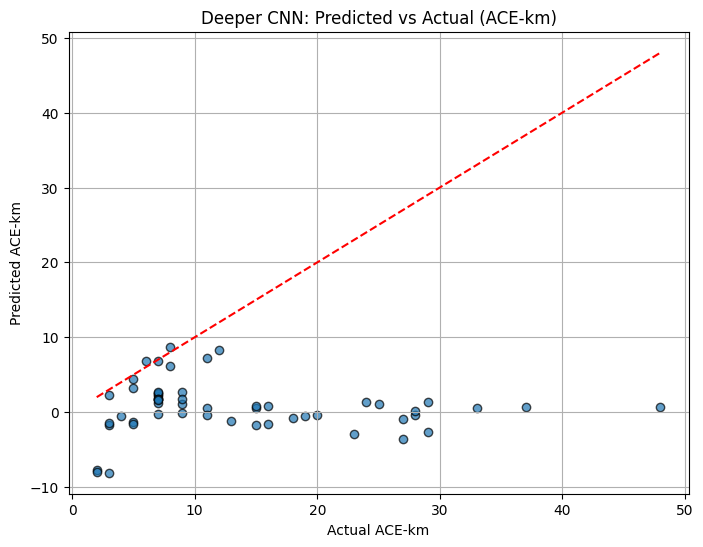

Cross-Validation MSE for ACE-km: 282.5141
Cross-Validation R2 for ACE-km:  -1.7237

=== Target: H2-km ===


2025-01-27 16:45:48.276230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:45:51.729625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 287ms/step


2025-01-27 16:45:52.581384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:45:56.892968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 398ms/step


2025-01-27 16:45:57.869085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:46:01.289767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 315ms/step


2025-01-27 16:46:02.184090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:46:08.126227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 398ms/step


2025-01-27 16:46:09.092981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:46:13.141453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 318ms/step


2025-01-27 16:46:14.027261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:46:17.474571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 338ms/step


2025-01-27 16:46:20.474386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:46:24.698028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 405ms/step


2025-01-27 16:46:25.675177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:46:33.965841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 305ms/step


2025-01-27 16:46:34.842973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:46:41.193857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 359ms/step


2025-01-27 16:46:42.135999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:46:46.883689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 341ms/step


2025-01-27 16:46:47.787791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:46:53.610550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 326ms/step


2025-01-27 16:46:54.503442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:46:58.162526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 342ms/step


2025-01-27 16:46:59.079100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:47:02.381706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 327ms/step


2025-01-27 16:47:03.276379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:47:06.463627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 344ms/step


2025-01-27 16:47:09.461343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:47:14.662042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 455ms/step


2025-01-27 16:47:15.704287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:47:19.130659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 368ms/step


2025-01-27 16:47:20.036901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:47:24.289520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 365ms/step


2025-01-27 16:47:25.222241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 16:47:31.932381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 456ms/step


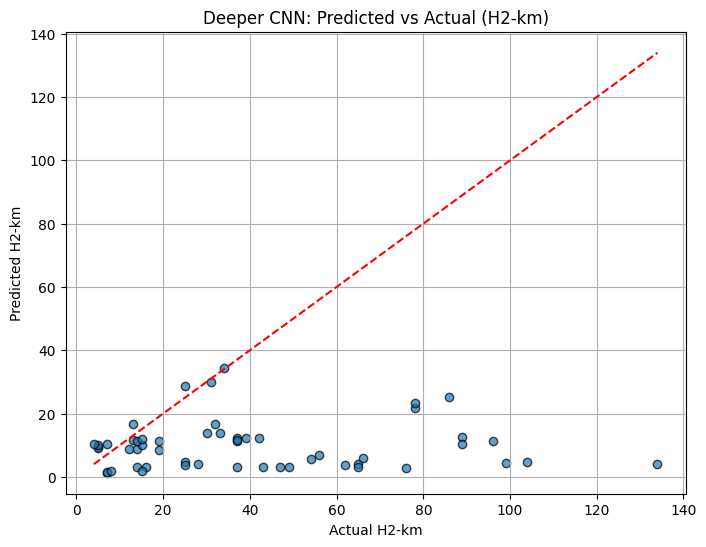

Cross-Validation MSE for H2-km: 1906.2167
Cross-Validation R2 for H2-km:  -0.9908


In [27]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Cross-validation loop
logo = LeaveOneGroupOut()

# Prepare target columns and groups
target_columns = ['ACE-km', 'H2-km']  # Your regression targets
groups = df_cleaned[digester_columns].idxmax(axis=1)  # Define groups based on digesters

for target_column in target_columns:
    print(f"\n=== Target: {target_column} ===")
    
    # Prepare features (X) and target (y)
    X_df = df_cleaned.drop(columns=target_columns)  # Drop other targets
    y_df = df_cleaned[target_column]
    
    X = X_df.values
    y = y_df.values

    # Reshape for Conv1D (if needed) or leave as flat for Dense layers
    X = X.reshape((X.shape[0], X.shape[1], 1))  # (samples, features, 1)

    y_tests, y_preds = [], []

    for train_idx, test_idx in logo.split(X, y, groups):
        # Split data into training and test sets
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Build the deeper CNN model
        model = build_deeper_cnn((X_train.shape[1], 1))  # Input shape (features, 1)

        # Set up early stopping to prevent overfitting
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='loss', patience=5, restore_best_weights=True
        )

        # Train the model
        model.fit(
            X_train, y_train,
            epochs=100, batch_size=16,
            verbose=0, callbacks=[early_stopping]
        )

        # Predict on the test set
        y_pred = model.predict(X_test).flatten()  # Flatten output for evaluation
        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    # Evaluate performance across all folds
    mse = mean_squared_error(y_tests, y_preds)
    r2 = r2_score(y_tests, y_preds)

    # Plot actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='k')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'r--')
    plt.xlabel(f'Actual {target_column}')
    plt.ylabel(f'Predicted {target_column}')
    plt.title(f'Deeper CNN: Predicted vs Actual ({target_column})')
    plt.grid(True)
    plt.show()

    print(f"Cross-Validation MSE for {target_column}: {mse:.4f}")
    print(f"Cross-Validation R2 for {target_column}:  {r2:.4f}")


## MLP + PCA


=== Target: ACE-km ===


2025-01-27 17:18:40.796858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 84ms/step


2025-01-27 17:18:42.612841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:18:42.891936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 38ms/step


2025-01-27 17:18:44.031704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:18:44.253973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 45ms/step


2025-01-27 17:18:45.349180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:18:45.605439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 40ms/step


2025-01-27 17:18:46.666470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:18:46.893476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 55ms/step


2025-01-27 17:18:47.779714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:18:48.030084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 36ms/step


2025-01-27 17:18:49.166026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:18:49.391570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 36ms/step


2025-01-27 17:18:50.640370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:18:50.878414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 43ms/step


2025-01-27 17:18:51.956074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:18:52.186290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 52ms/step


2025-01-27 17:18:53.114692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:18:53.349695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 36ms/step


2025-01-27 17:18:54.368647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:18:54.591010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 39ms/step


2025-01-27 17:18:55.831060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:18:56.053990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 45ms/step


2025-01-27 17:18:57.378390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:18:57.608505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 40ms/step


2025-01-27 17:18:58.499838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:18:58.727082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 38ms/step


2025-01-27 17:19:00.131584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:19:00.392878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 37ms/step


2025-01-27 17:19:01.271019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:19:01.497298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 38ms/step


2025-01-27 17:19:02.663242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:19:02.872700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 43ms/step


2025-01-27 17:19:03.385859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:19:03.606194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 36ms/step


2025-01-27 17:19:04.768579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


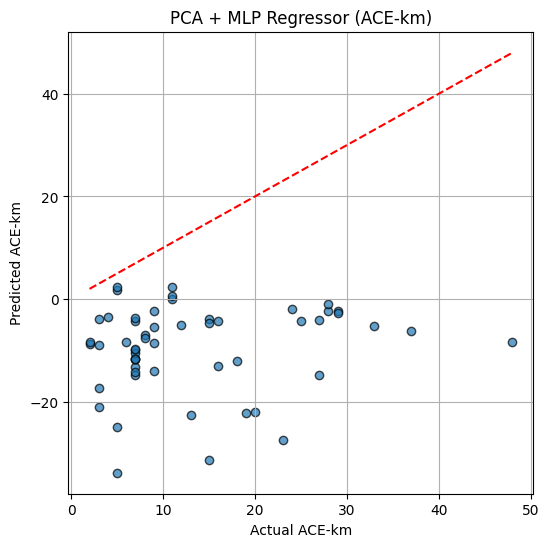

Cross-Validation MSE: 677.9409
Cross-Validation R2:  -5.5359

=== Target: H2-km ===


2025-01-27 17:19:06.903793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 99ms/step


2025-01-27 17:19:08.704257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:19:09.001105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 39ms/step


2025-01-27 17:19:10.147399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:19:10.366242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 39ms/step


2025-01-27 17:19:11.754127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:19:11.977757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 51ms/step


2025-01-27 17:19:12.999014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:19:13.279530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 38ms/step


2025-01-27 17:19:14.469266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:19:14.687852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 110ms/step


2025-01-27 17:19:16.193638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:19:16.549012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 42ms/step


2025-01-27 17:19:18.071277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:19:18.332406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 97ms/step


2025-01-27 17:19:19.563923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:19:19.919778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 42ms/step


2025-01-27 17:19:21.128259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:19:21.349432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 36ms/step


2025-01-27 17:19:22.375536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:19:22.593273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 79ms/step


2025-01-27 17:19:23.694148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:19:23.931105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 39ms/step


2025-01-27 17:19:25.346422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:19:25.569925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 37ms/step


2025-01-27 17:19:26.865543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:19:27.085556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 36ms/step


2025-01-27 17:19:28.107907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:19:28.393517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 38ms/step


2025-01-27 17:19:29.571300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:19:29.789261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 36ms/step


2025-01-27 17:19:30.538616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:19:30.765479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 43ms/step


2025-01-27 17:19:31.644064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-01-27 17:19:31.867467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 37ms/step


2025-01-27 17:19:32.949569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


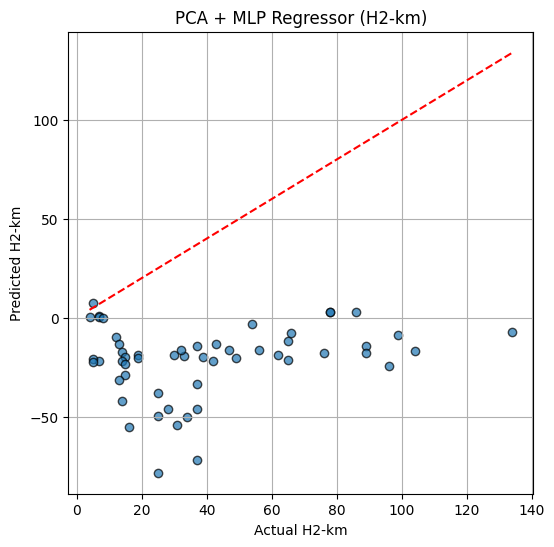

Cross-Validation MSE: 4826.6318
Cross-Validation R2:  -4.0407


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Sequential

# Define MLP regressor
def build_mlp_regressor(input_dim):
    """
    Builds an MLP-based regressor optimized for tabular data.
    """
    model = Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='linear')  # Regression output
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mse')
    return model

# Load and preprocess data
df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)].copy()

# Identify groups
digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]
groups = df_cleaned[digester_columns].idxmax(axis=1)

target_columns = ['ACE-km', 'H2-km']
non_target_columns = df_cleaned.select_dtypes(include=[np.number]).columns.difference(target_columns)

# Standard scaling for numeric features
scaler = StandardScaler()
df_cleaned[non_target_columns] = scaler.fit_transform(df_cleaned[non_target_columns])
df_cleaned = df_cleaned.astype(np.float32)

# Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

for target_column in target_columns:
    print(f"\n=== Target: {target_column} ===")
    
    X_df = df_cleaned.drop(columns=target_columns)
    y_df = df_cleaned[target_column]

    X = X_df.values  # Features
    y = y_df.values  # Target

    # PCA for Dimensionality Reduction
    pca = PCA(n_components=32)  # Reduce to 32 dimensions (you can tune this)
    X_pca = pca.fit_transform(X)

    y_tests, y_preds = [], []

    for train_idx, test_idx in logo.split(X_pca, y, groups):
        X_train, X_test = X_pca[train_idx], X_pca[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Build and train MLP regressor
        regressor = build_mlp_regressor(X_train.shape[1])
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
        regressor.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, callbacks=[early_stopping])

        # Predict
        y_pred = regressor.predict(X_test).flatten()
        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    # Evaluate performance
    mse = mean_squared_error(y_tests, y_preds)
    r2 = r2_score(y_tests, y_preds)

    # Plot actual vs. predicted
    plt.figure(figsize=(6, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='k')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'r--')
    plt.xlabel(f'Actual {target_column}')
    plt.ylabel(f'Predicted {target_column}')
    plt.title(f'PCA + MLP Regressor ({target_column})')
    plt.grid(True)
    plt.show()
    
    print(f"Cross-Validation MSE: {mse:.4f}")
    print(f"Cross-Validation R2:  {r2:.4f}")


## TabNet

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from pytorch_tabnet.tab_model import TabNetRegressor
import matplotlib.pyplot as plt

# Load and preprocess data
df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)].copy()

# Identify groups
digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]
groups = df_cleaned[digester_columns].idxmax(axis=1)

target_columns = ['ACE-km', 'H2-km']
non_target_columns = df_cleaned.select_dtypes(include=[np.number]).columns.difference(target_columns)

# Standard scaling for numeric features
scaler = StandardScaler()
df_cleaned[non_target_columns] = scaler.fit_transform(df_cleaned[non_target_columns])
df_cleaned = df_cleaned.astype(np.float32)

# Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

for target_column in target_columns:
    print(f"\n=== Target: {target_column} ===")
    
    X_df = df_cleaned.drop(columns=target_columns)
    y_df = df_cleaned[target_column]

    X = X_df.values  # Features
    y = y_df.values  # Target

    y_tests, y_preds = [], []

    for train_idx, test_idx in logo.split(X, y, groups):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Reshape targets to 2D as required by TabNet
        y_train = y_train.reshape(-1, 1)
        y_test = y_test.reshape(-1, 1)

        # Train TabNet Regressor
        tabnet = TabNetRegressor(verbose=0, seed=42)
        tabnet.fit(
            X_train, y_train,
            eval_set=[(X_test, y_test)],
            patience=5, max_epochs=10
        )

        # Predict
        y_pred = tabnet.predict(X_test).flatten()  # Flatten predictions to compare with true values
        y_tests.extend(y_test.flatten())  # Flatten true values for evaluation
        y_preds.extend(y_pred)

    # Evaluate performance
    mse = mean_squared_error(y_tests, y_preds)
    r2 = r2_score(y_tests, y_preds)

    # Plot actual vs. predicted
    plt.figure(figsize=(6, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='k')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'r--')
    plt.xlabel(f'Actual {target_column}')
    plt.ylabel(f'Predicted {target_column}')
    plt.title(f'TabNet Regressor ({target_column})')
    plt.grid(True)
    plt.show()
    
    print(f"Cross-Validation MSE: {mse:.4f}")
    print(f"Cross-Validation R2:  {r2:.4f}")


: 